In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
%load_ext autoreload
%autoreload 2
from FunctionalSmoothingSpline import *

# Example Fig 1

In [5]:
filename = "./Data1.csv"
MyData = pd.read_csv(filename, sep=";", decimal=',')
print(MyData)

          t_f  y_f
0  20.02.2021  100
1  05.03.2021  200
2  20.03.2021   10
3  20.04.2021   10
4  20.05.2021  100
5  20.06.2021   10
6  20.07.2021  100


In [6]:
t_f = pd.to_datetime(MyData.t_f.dropna(), format='%d.%m.%Y')
t_start = min(t_f)
t_f = np.array([(x-t_start).days for x in t_f])

y_f = MyData.y_f.dropna().to_numpy()

m = round(3 * len(t_f))
m

21

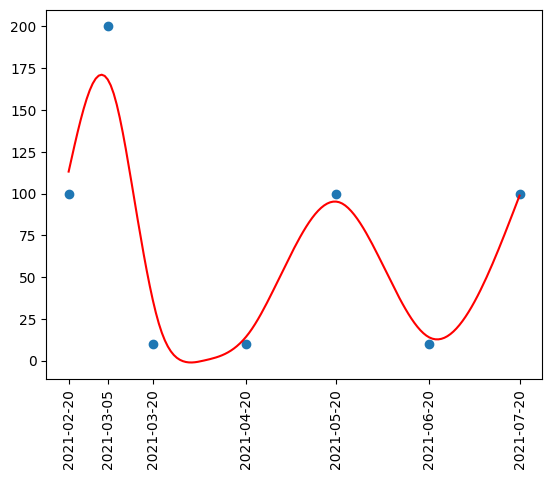

In [7]:
r = FunctionalSmoothingSpline(t_f=t_f,
                                  values_f=y_f,
                                  knots_number=m,
                                  alpha=10 ** 2,
                                  All_Positive=True,
                                  method="Lemke",
                                  integral=False,
                                  info=True)

x = r['x']
y = r['y']
plt.plot(x, y, color="red")
t = t_f
plt.xticks(ticks=t, labels=[(t_start + pd.Timedelta(tx, "d")).date() for tx in t],
           rotation='vertical')
plt.scatter(t_f,y_f)
plt.show()

# Example Fig 2

In [8]:
filename = "./Data2.csv"
MyData = pd.read_csv(filename, sep=";", decimal=',')
print(MyData)

          t_f   y_f        t_df  y_df       t_d2f  y_d2f
0  20.02.2021  40.0  31.03.2021     5  19.05.2021    0.0
1  08.12.2021  20.0  07.05.2021   -15  01.09.2021    0.0
2  01.01.2022   0.0  06.07.2021     0         NaN    NaN
3         NaN   NaN  11.08.2021     5         NaN    NaN
4         NaN   NaN  29.09.2021     0         NaN    NaN


In [10]:
t_f = pd.to_datetime(MyData.t_f.dropna(), format='%d.%m.%Y')
t_df = pd.to_datetime(MyData.t_df.dropna(), format='%d.%m.%Y')
t_d2f = pd.to_datetime(MyData.t_d2f.dropna(), format='%d.%m.%Y')
t_start = min(min(t_f), min(t_df), min(t_d2f) )#, t_int_a)
t_f = np.array([(x-t_start).days for x in t_f])
t_df = np.array([(x-t_start).days for x in t_df])
t_d2f = np.array([(x-t_start).days for x in t_d2f])

y_f = MyData.y_f.dropna().to_numpy()
y_df = MyData.y_df.dropna().to_numpy()
y_d2f = MyData.y_d2f.dropna().to_numpy()

m = round(3 * (len(t_f) + len(t_df) + len(t_d2f) ))#+ len(t_int_a)))
m

30

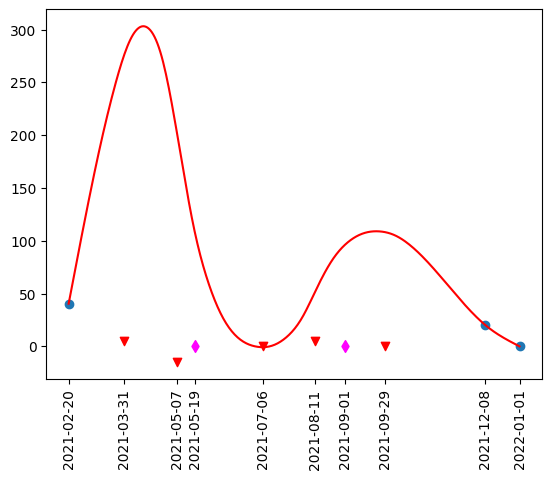

In [12]:
r = FunctionalSmoothingSpline(t_f=t_f,
                              values_f=y_f,
                              t_df=t_df,
                              values_df=y_df,
                              coef_df = 10,
                              t_d2f=t_d2f,
                              values_d2f=y_d2f,
                              coef_d2f = 20,
                              knots_number=m,
                              alpha=10 ** 2,
                              All_Positive=True,
                              method="Lemke",
                              integral=False,
                              info=True)

x = r['x']
y = r['y']
plt.plot(x, y, color="red")
t = np.concatenate ((t_f, t_df , t_d2f))
plt.xticks(ticks=t, labels=[(t_start + pd.Timedelta(tx, "d")).date() for tx in t],
           rotation='vertical')
plt.scatter(t_f,y_f)
plt.scatter(t_df, y_df,marker="v", color="red")
plt.scatter(t_d2f, y_d2f,marker="d", color="magenta")
plt.show()

# Example Fig 3

In [13]:
filename = "./Data3.csv"
MyData = pd.read_csv(filename, sep = ";", decimal=',')
MyData

,t_f,y_f,t_df,y_df,t_d2f,y_d2f,t_int_a,t_int_b,y_int
0,20.02.2021,100.0,31.03.2021,0.000000,19.05.2021,0.0,25.03.2021,24.04.2021,3999.916
1,08.12.2021,20.0,07.05.2021,-1.749674,NaN,NaN,21.10.2021,20.11.2021,2281.669
2,01.01.2022,0.0,06.07.2021,0.000000,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,11.08.2021,1.552171,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,29.09.2021,0.000000,NaN,NaN,NaN,NaN,NaN


In [14]:
pd.to_datetime(MyData.t_f.dropna(), format='%d.%m.%Y')

0   2021-02-20
1   2021-12-08
2   2022-01-01
Name: t_f, dtype: datetime64[ns]

In [15]:
t_f = pd.to_datetime(MyData.t_f.dropna(), format='%d.%m.%Y')
t_df = pd.to_datetime(MyData.t_df.dropna(), format='%d.%m.%Y')
t_d2f = pd.to_datetime(MyData.t_d2f.dropna(), format='%d.%m.%Y')
t_int_a = pd.to_datetime(MyData.t_int_a.dropna(), format='%d.%m.%Y')
t_int_b = pd.to_datetime(MyData.t_int_b.dropna(), format='%d.%m.%Y')

t_start = min(min(t_f),min(t_df),min(t_d2f),min(t_int_a))
t_f = np.array([(x-t_start).days for x in t_f])
t_df = np.array([(x-t_start).days for x in t_df])
t_d2f = np.array([(x-t_start).days for x in t_d2f])
t_int_a = np.array([(x-t_start).days for x in t_int_a])
t_int_b = np.array([(x-t_start).days for x in t_int_b])

y_f = MyData.y_f.dropna().to_numpy()
y_df = MyData.y_df.dropna().to_numpy()
y_d2f = MyData.y_d2f.dropna().to_numpy()
y_int = MyData.y_int.dropna().to_numpy()

m = round(3*(len(t_f) + len(t_df) + len(t_d2f) + len(t_int_a)))
m

33

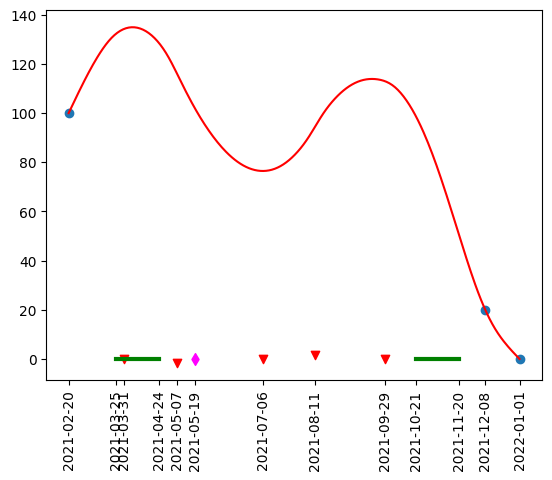

In [16]:
r = FunctionalSmoothingSpline(	t_f = t_f,
                				values_f = y_f,
                				t_df = t_df,
                				values_df = y_df,
                				t_d2f = t_d2f,
                				values_d2f = y_d2f,
                				t_int_a = t_int_a,
                				t_int_b = t_int_b, 
                				values_int = y_int,
                				knots_number = m,
                				alpha = 10**1,
                                All_Positive = False,
                				info = True)
x = r['x']
y = r['y']
plt.plot(x, y, color="red")
t = np.concatenate((t_f, t_df, t_d2f,t_int_a,t_int_b))
plt.xticks(ticks=t, labels=[(t_start + pd.Timedelta(tx, "d")).date() for tx in t],
               rotation='vertical')
plt.scatter(t_f,y_f)
plt.scatter(t_df, y_df,marker="v", color="red")
plt.scatter(t_d2f, y_d2f,marker="d", color="magenta")
plt.plot([t_int_a[0],t_int_b[0]], [0,0], '-g', linewidth=3)
plt.plot([t_int_a[1],t_int_b[1]], [0,0], '-g', linewidth=3)
plt.show()



In [17]:
r

{'x': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 1

# Example Fig 4-7

In [18]:
filename = "./Sales1.csv"
MyData = pd.read_csv(filename, sep = ";", decimal=',')
MyData

,t,Values
0,01.12.2009,21.95
1,17.12.2009,5.70
2,18.01.2010,18.75
3,05.03.2010,15.25
4,23.03.2010,8.50
5,07.06.2010,7.95
6,13.10.2010,19.30
7,12.12.2010,31.30
8,21.01.2011,8.25
9,31.03.2011,3.90


In [19]:
t = pd.to_datetime(MyData.t.dropna(), format='%d.%m.%Y')
t_start = min(t)
t = np.array([(x-t_start).days for x in t])
Y = MyData.Values.dropna().to_numpy()
n = len(t)
Y = Y[0:(n-1)]
m = round(3*n)
t

array([  0,  16,  48,  94, 112, 188, 316, 376, 416, 485, 502, 513, 583])

In [20]:
n

13

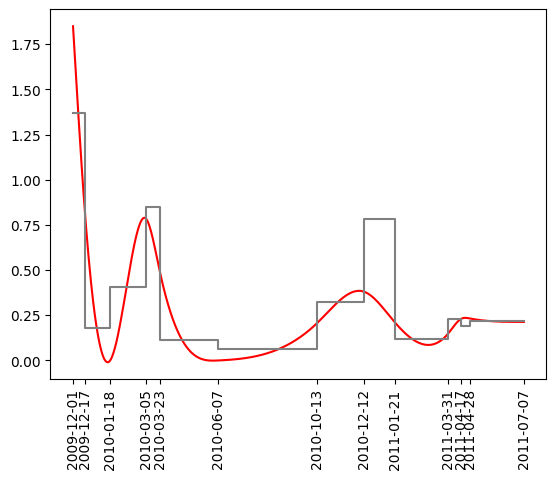

In [21]:
W = np.ones(n-1)
W[7] = 0.01
#x = np.append(np.arange(t[0],t[-1],15), t[-1])
r = FunctionalSmoothingSpline(	t_int_a = t[0:(n-1)],
                				t_int_b = t[1:n], 
                				values_int = Y,
                				#knots_number = m,
                                knots = t,
                                weights_int = W,
                                #x = x,
                				alpha = 10**5,
                                All_Positive = True, integral = False, info = True)

x = r['x']
y = r['y']
#x = np.append(np.arange(t[0],t[-1],1), t[-1])

plt.plot(x, y, color = "red")
x2 = np.array([])
y2 = np.array([])
for i in range(n-1):
    x2 = np.append(x2,[ t[i], t[i+1] ])
    y2 = np.append(y2, [ Y[i]/(t[i+1]-t[i]), Y[i]/(t[i+1]-t[i]) ] )
plt.plot(x2,y2,color="grey")
plt.xticks(ticks=t, labels=[(t_start+pd.Timedelta(tx,"d")).date() for tx in t], rotation='vertical')
plt.show()
#print(r)

In [22]:
y

array([ 1.85001979e+00,  1.77820470e+00,  1.70651449e+00,  1.63507405e+00,
        1.56400825e+00,  1.49344198e+00,  1.42350013e+00,  1.35430757e+00,
        1.28598920e+00,  1.21866988e+00,  1.15247450e+00,  1.08752795e+00,
        1.02395511e+00,  9.61880861e-01,  9.01430085e-01,  8.42727664e-01,
        7.85898483e-01,  7.31045946e-01,  6.78187556e-01,  6.27319339e-01,
        5.78437318e-01,  5.31537521e-01,  4.86615972e-01,  4.43668696e-01,
        4.02691719e-01,  3.63681067e-01,  3.26632765e-01,  2.91542838e-01,
        2.58407311e-01,  2.27222210e-01,  1.97983561e-01,  1.70687389e-01,
        1.45329718e-01,  1.21906575e-01,  1.00413985e-01,  8.08479736e-02,
        6.32045656e-02,  4.74797867e-02,  3.36696623e-02,  2.17702178e-02,
        1.17774785e-02,  3.68746985e-03, -2.50378277e-03, -6.80025397e-03,
       -9.20591836e-03, -9.72475054e-03, -8.36072514e-03, -5.11781675e-03,
        0.00000000e+00,  6.97429525e-03,  1.57288181e-02,  2.61728623e-02,
        3.82157216e-02,  